In [3]:
import numpy as np
import matplotlib.pyplot as plt

Si une fonction admet une inverse alors elle est forcement **injective**

Une application **injective** est une application telle que tout y ∈ F a au plus un
antécédent par f.

```Proposition 1.1.``` Une application f est inversible si et seulement si elle est **bijective.**

---

# Test de ligne horizontale

Une ligne horizontale est une ligne droite et plate qui va de gauche à droite. 

Étant donné une fonction (c'est-à-dire des nombres réels aux nombres réels), nous pouvons décider si elle est injective en regardant les lignes horizontales qui coupent le graphe de la fonction .

- Si une ligne horizontale coupe le graphique en plusieurs points, la fonction n'est pas injective. 

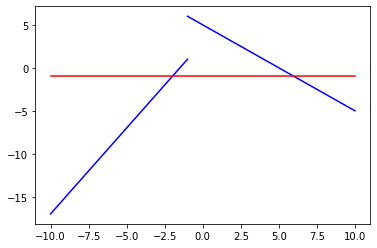

In [18]:
X = np.linspace(-10,-1,5)
plt.plot(X,2*X + 3,'b')
X = np.linspace(-1,10,5)
plt.plot(X, - X + 5,'b')
X = np.linspace(-10,10,5)
plt.plot(X, 0*X -1,'r');

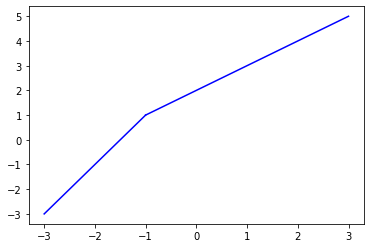

In [17]:
X = np.linspace(-3,-1,5)
plt.plot(X,2*X + 3,'b')
X = np.linspace(-1,3,5)
plt.plot(X, X + 2,'b');

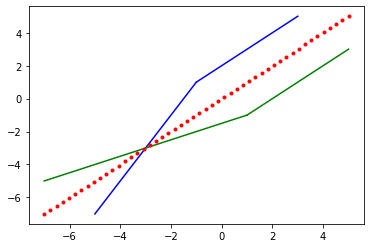

In [37]:
X = np.linspace(-5,-1,5)
plt.plot(X,2*X + 3,'b')
X = np.linspace(-1,3,5)
plt.plot(X, X + 2,'b');
X = np.linspace(-7,1,5)
plt.plot(X, (X - 3)/2,'g')
X = np.linspace(1,5,5)
plt.plot(X, X - 2,'g');
X = np.linspace(-7,5,50)
plt.plot(X,X,'r.');

---

# fonctions élémentaires.

- constantes,
- exponentielles, logarithmes, 
- puissances, polynomes, inverses
- racines n-ièmes 
- fonctions trigonométriques et leur inverses 

sont élémentaires.

In [43]:
A = np.array([1, 2, 2, 0]).reshape(2,2)

In [44]:
B = np.array([2, 1, 0,
3,  -1, 3]).reshape(2,3)

In [45]:
A.dot(B)

array([[ 8, -1,  6],
       [ 4,  2,  0]])

In [86]:
A = np.array([1, 2, 0,
-6, 3, 8,
5, 8, 1]).reshape(3,3)

B = np.array([1, 1,
1, 0,
0, 1]).reshape(3,-1)

In [87]:
A.dot(B)

array([[ 3,  1],
       [-3,  2],
       [13,  6]])

In [84]:
A = np.array([4, 2, 2, 0,
12, 1, 7, 1,
3, -1, 0, 0,
0, 2, 2, 2,
0, 0, 0, 0]).reshape(-1,4)

B = np.array([2, 0,
1, 1,
2, 2,
1, 0]).reshape(4,-1)

In [85]:
print(np.around( A.dot(B) ))

[[14  6]
 [40 15]
 [ 5 -1]
 [ 8  6]
 [ 0  0]]


In [67]:
A, B = np.array([1, 2,2,0]).reshape(2,2), np.array([2, 1,
3, -1]).reshape(2,2)

In [83]:
print(np.around(A.dot(B)))

print(np.around(B.dot(A)) )

[[ 8 -1]
 [ 4  2]]
[[4 4]
 [1 6]]


In [33]:
import numpy as np

A = np.identity(3)
A[1:] *= -1
B = np.zeros((3,3))
B[0,1] = -1
B[1,0] = B[2,2] = 1
B

np.linalg.eig(A.dot(B))

A.dot(B)

array([[ 0., -1.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0., -1.]])

In [36]:
np.linalg.eig(B.dot(A))

(array([ 1., -1., -1.]),
 array([[ 0.70710678, -0.70710678,  0.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

In [38]:
B.dot(A), A.dot(B)

(array([[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0., -1.]]),
 array([[ 0., -1.,  0.],
        [-1.,  0.,  0.],
        [ 0.,  0., -1.]]))

 une réflexion ou symétrie axiale du plan euclidien est une symétrie orthogonale par rapport à une droite (droite vectorielle s'il s'agit d'un plan vectoriel euclidien). Elle constitue alors une symétrie axiale orthogonale.

Plus généralement, dans un espace euclidien quelconque, une réflexion est une symétrie orthogonale par rapport à un hyperplan, c'est-à-dire à un sous-espace de codimension 1. En dimension 3, il s'agit donc d'une symétrie orthogonale par rapport à un plan. L'origine du terme se conçoit bien en liaison avec les miroirs qui réfléchissent une image.

In [53]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(freq):
    x = np.linspace(0, 2*np.pi,1000)
    y = np.sin(x * freq)
    plt.plot(x, y)

interact(plot_func, freq = widgets.FloatSlider(value=2.5, min=1, 
max=5.0,step=0.5));

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0, min=1.0, step=0.5), Output()), _dom_…

In [1]:
pwd

'/home/macbuse/Documents/macbuse.github.io/MAT305'